# Crop Field Instance Segmentation Net

## 1. Description

This notebook is for training a YOLOV8 Convolutional Neural Net, via transfer learning, to accurately recognize and trace irregularly shaped farm crop fields in real-time. More specifically, the goal is to train the net to recognize crop fields with crop row separations that can be traversed by ground rovers of appropriate size.

## 2. Hardware Check

In [1]:
# Verify GPU hardware is available for training the neural net

!nvidia-smi

Fri Mar 31 01:10:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    45W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## 3. Download YOLOV8 Code

Download YOLOV8 source code from authors' code repository.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 25.7/166.8 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## 4. Download Training Data

Download custom image training data from Roboflow repository.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

DATA_SET_VERSION = 1

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR API KEY")
project = rf.workspace("YOUR WORKSPACE").project("YOUR PROJECT NAME")
dataset = project.version(DATA_SET_VERSION).download("yolov8")

## 5. Train Model

Train the neural net, using pre-trained weights.

In [7]:
%cd {HOME}

# !yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=140 batch=-1 imgsz=640
!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=140 batch=-1 imgsz=640 degrees=45 shear=15 perspective=0.001 flipud=0.5

/content
100% 137M/137M [00:01<00:00, 114MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/Crop-Field-Detection-3/data.yaml, epochs=140, patience=50, batch=-1, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

## 6. Training Results

In [8]:
!ls {HOME}/runs/segment/train/

args.yaml					      train_batch0.jpg
BoxF1_curve.png					      train_batch1.jpg
BoxP_curve.png					      train_batch2860.jpg
BoxPR_curve.png					      train_batch2861.jpg
BoxR_curve.png					      train_batch2862.jpg
confusion_matrix.png				      train_batch2.jpg
events.out.tfevents.1680225075.ceaaf7c46737.221888.0  val_batch0_labels.jpg
MaskF1_curve.png				      val_batch0_pred.jpg
MaskP_curve.png					      val_batch1_labels.jpg
MaskPR_curve.png				      val_batch1_pred.jpg
MaskR_curve.png					      val_batch2_labels.jpg
results.csv					      val_batch2_pred.jpg
results.png					      weights


/content


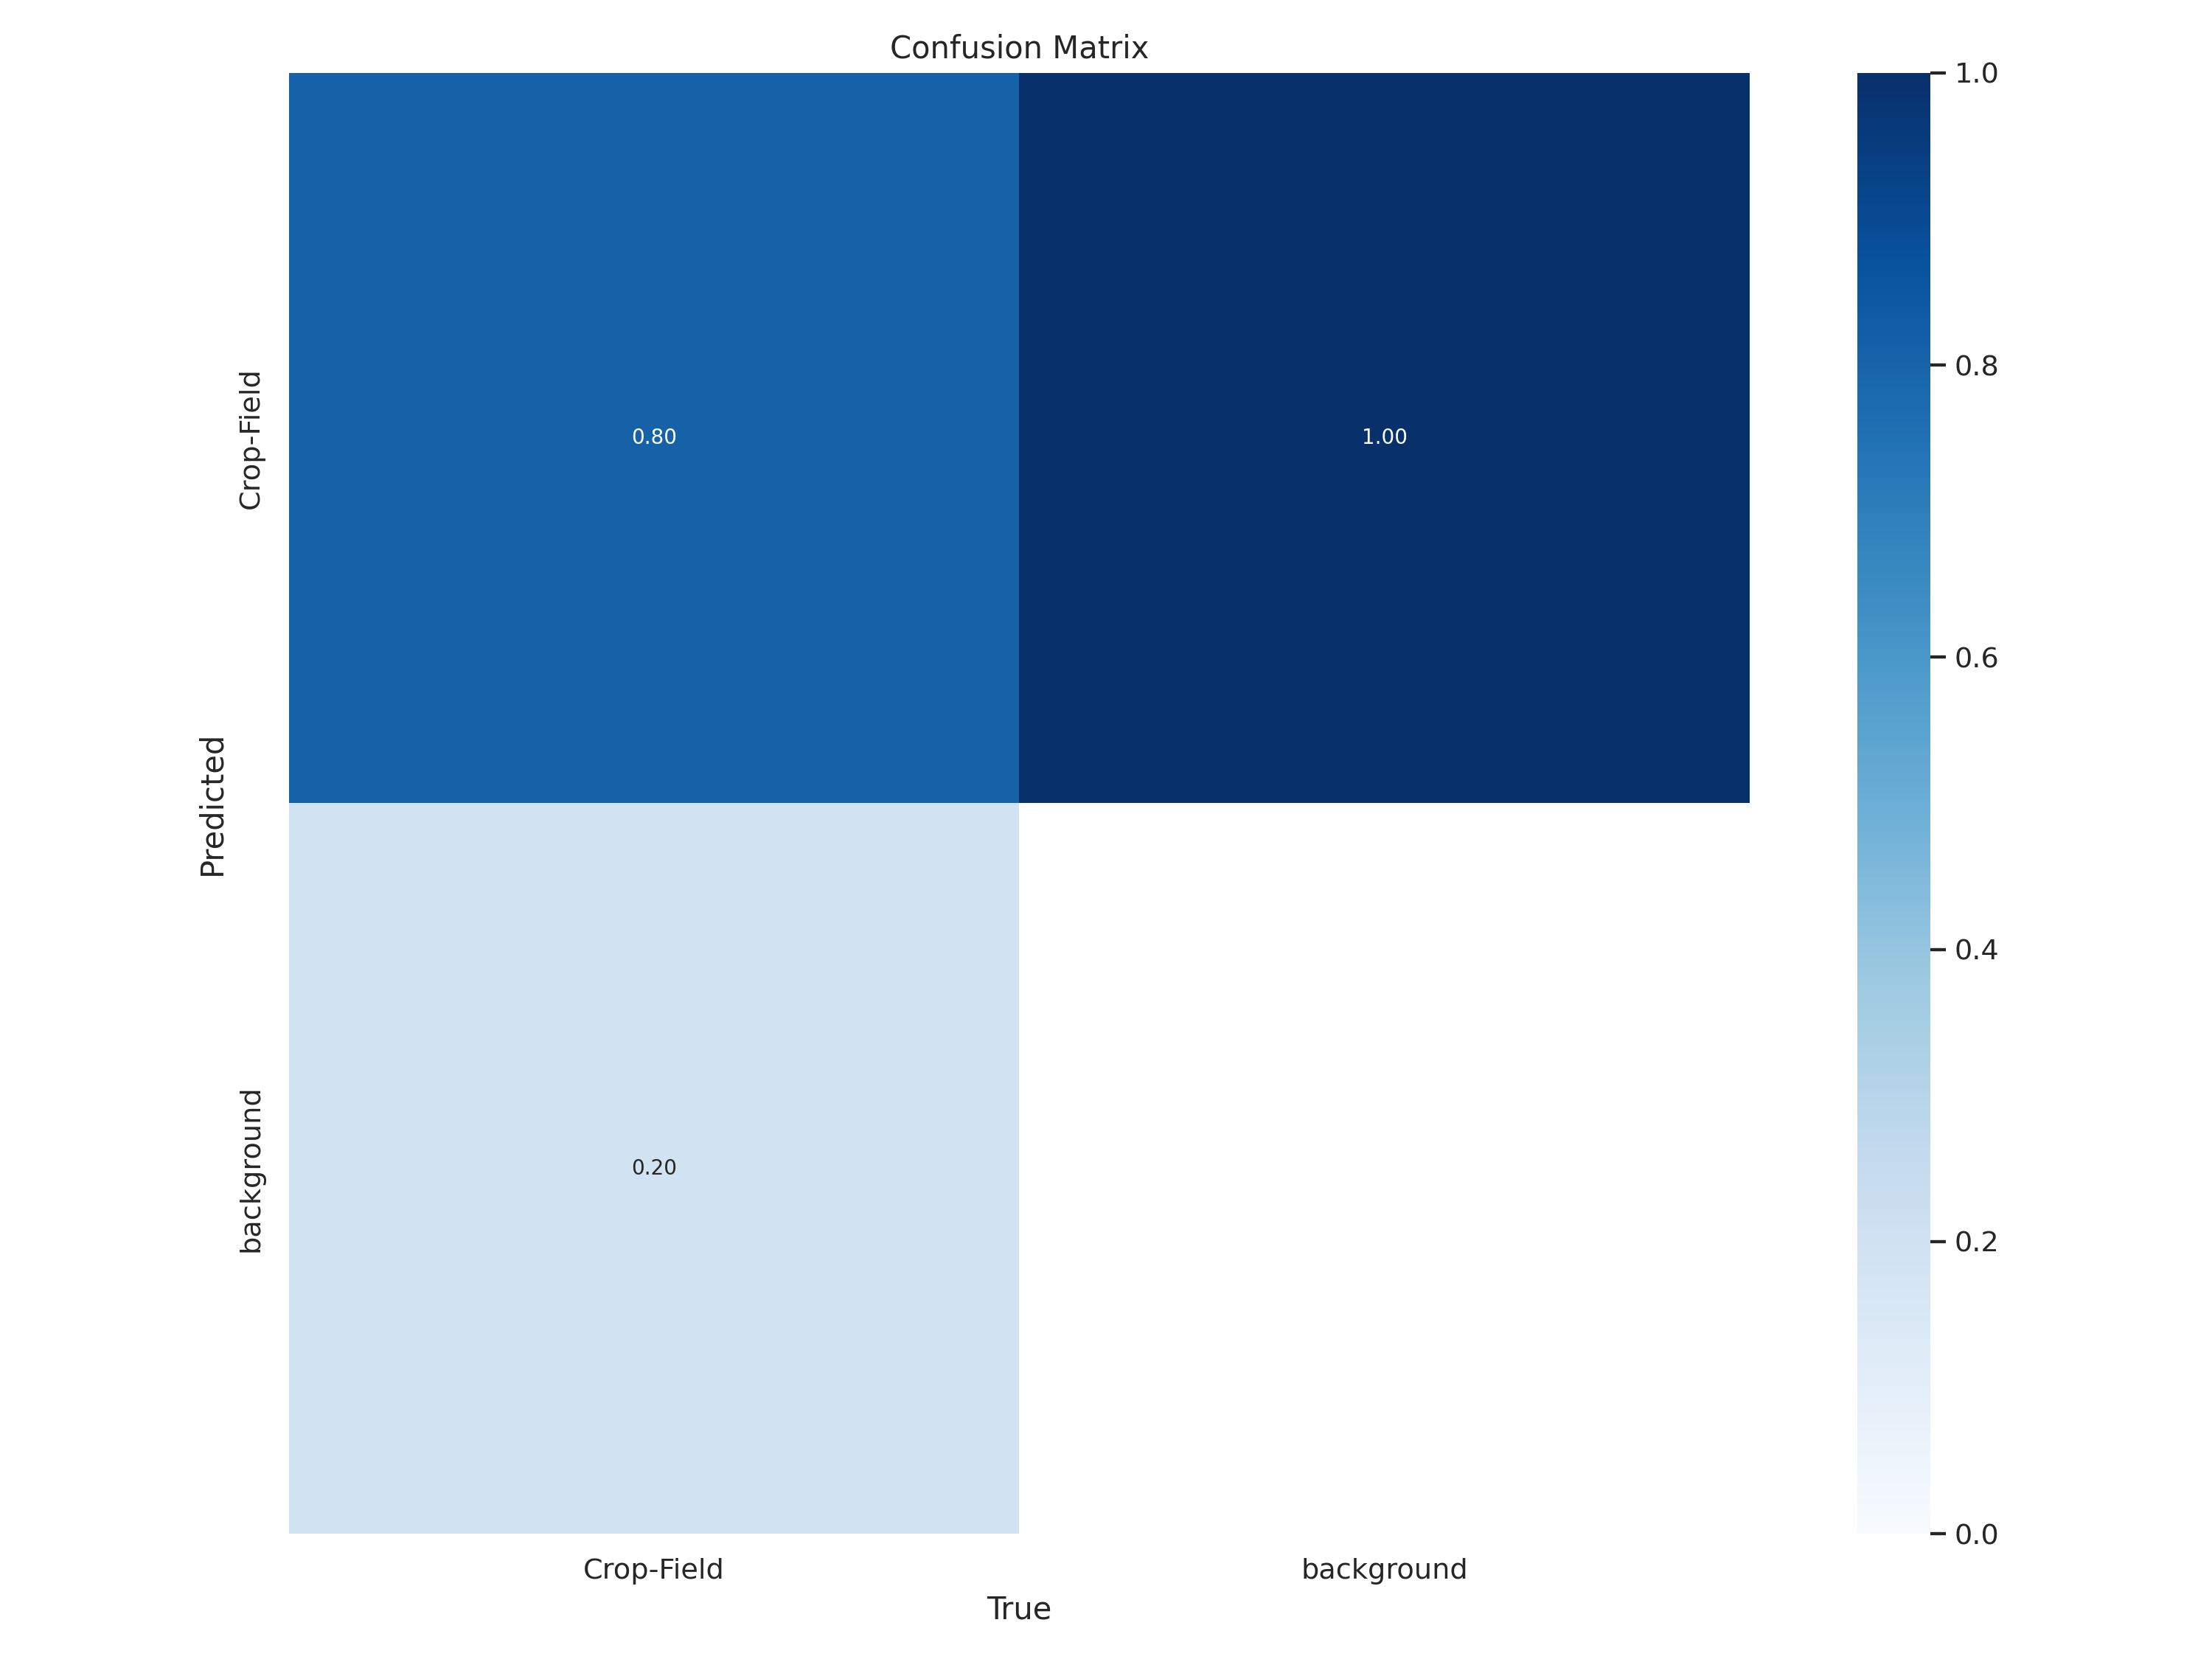

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1500)

/content


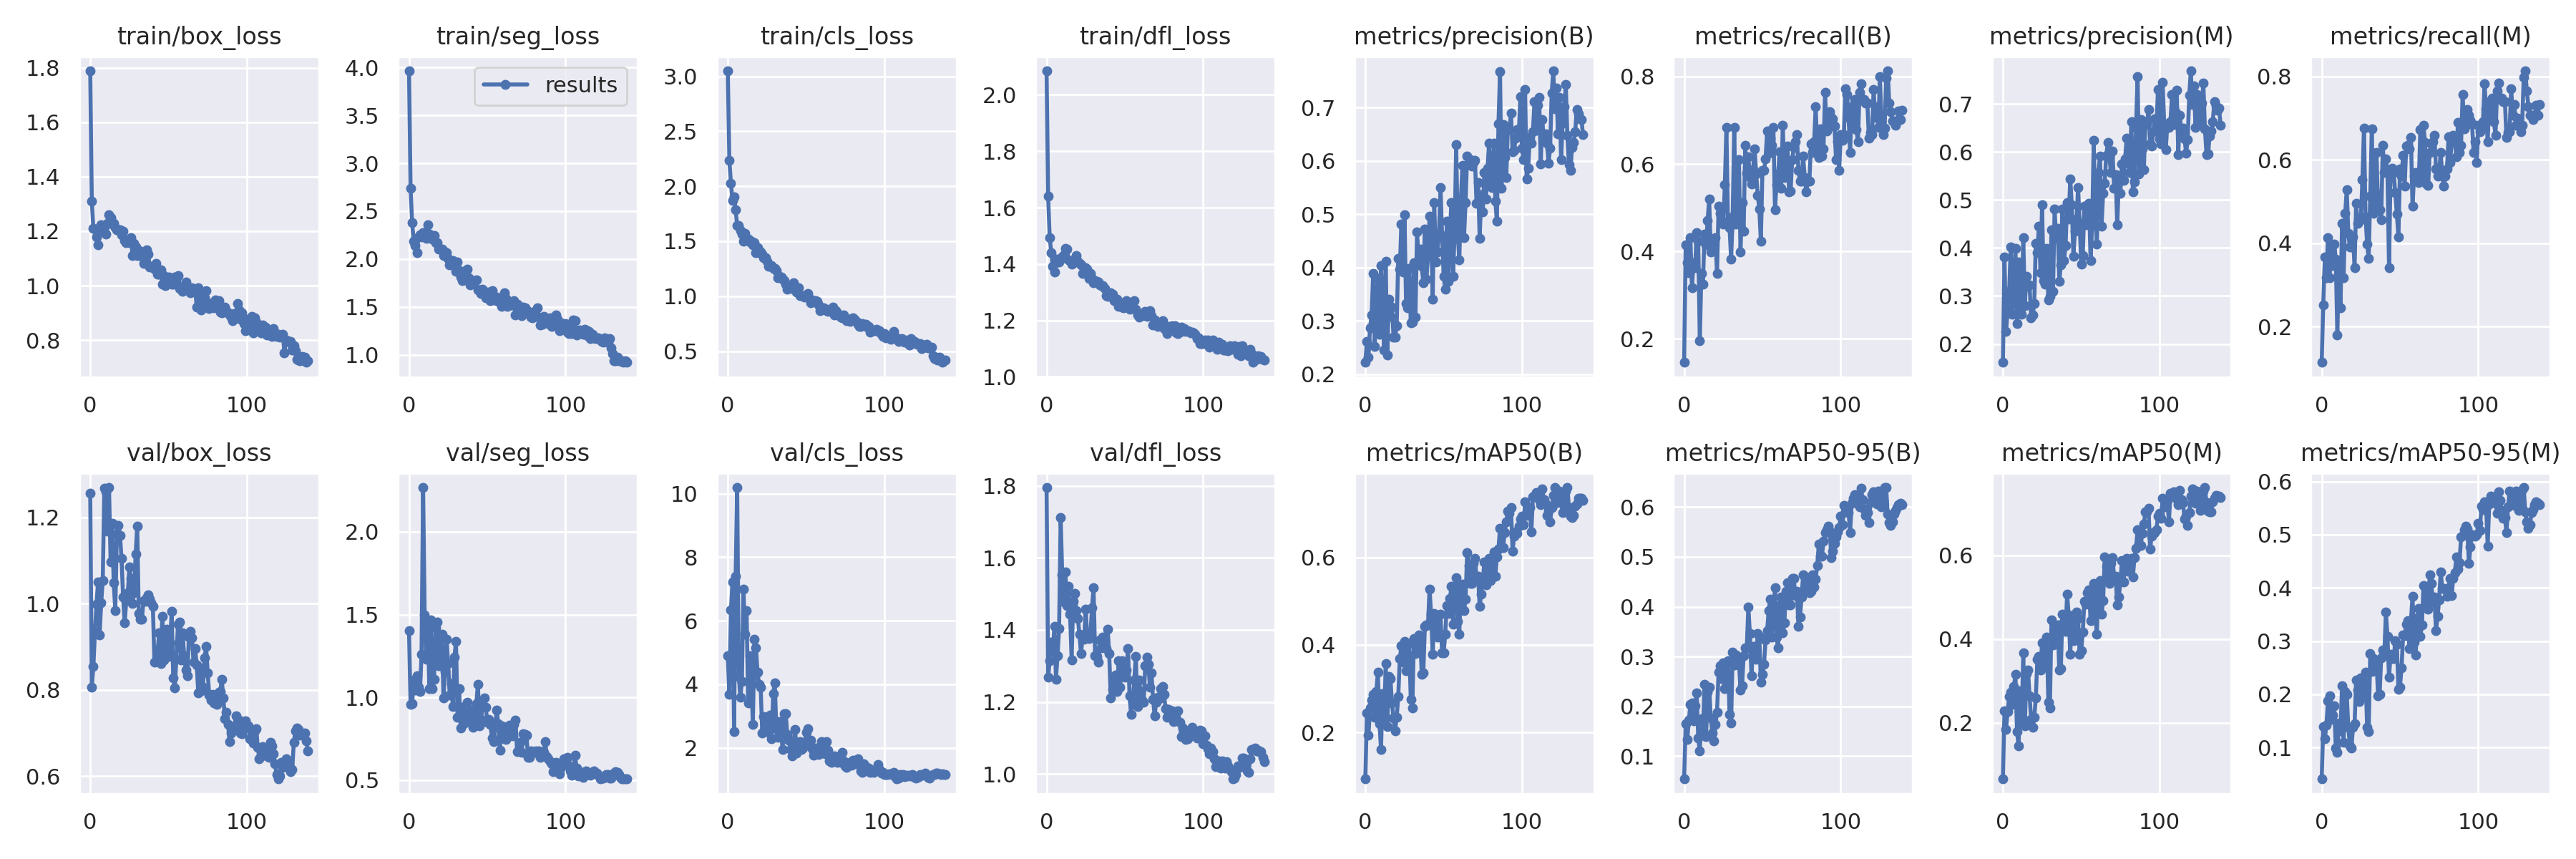

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1500)

## 7. Display Validation Results

/content


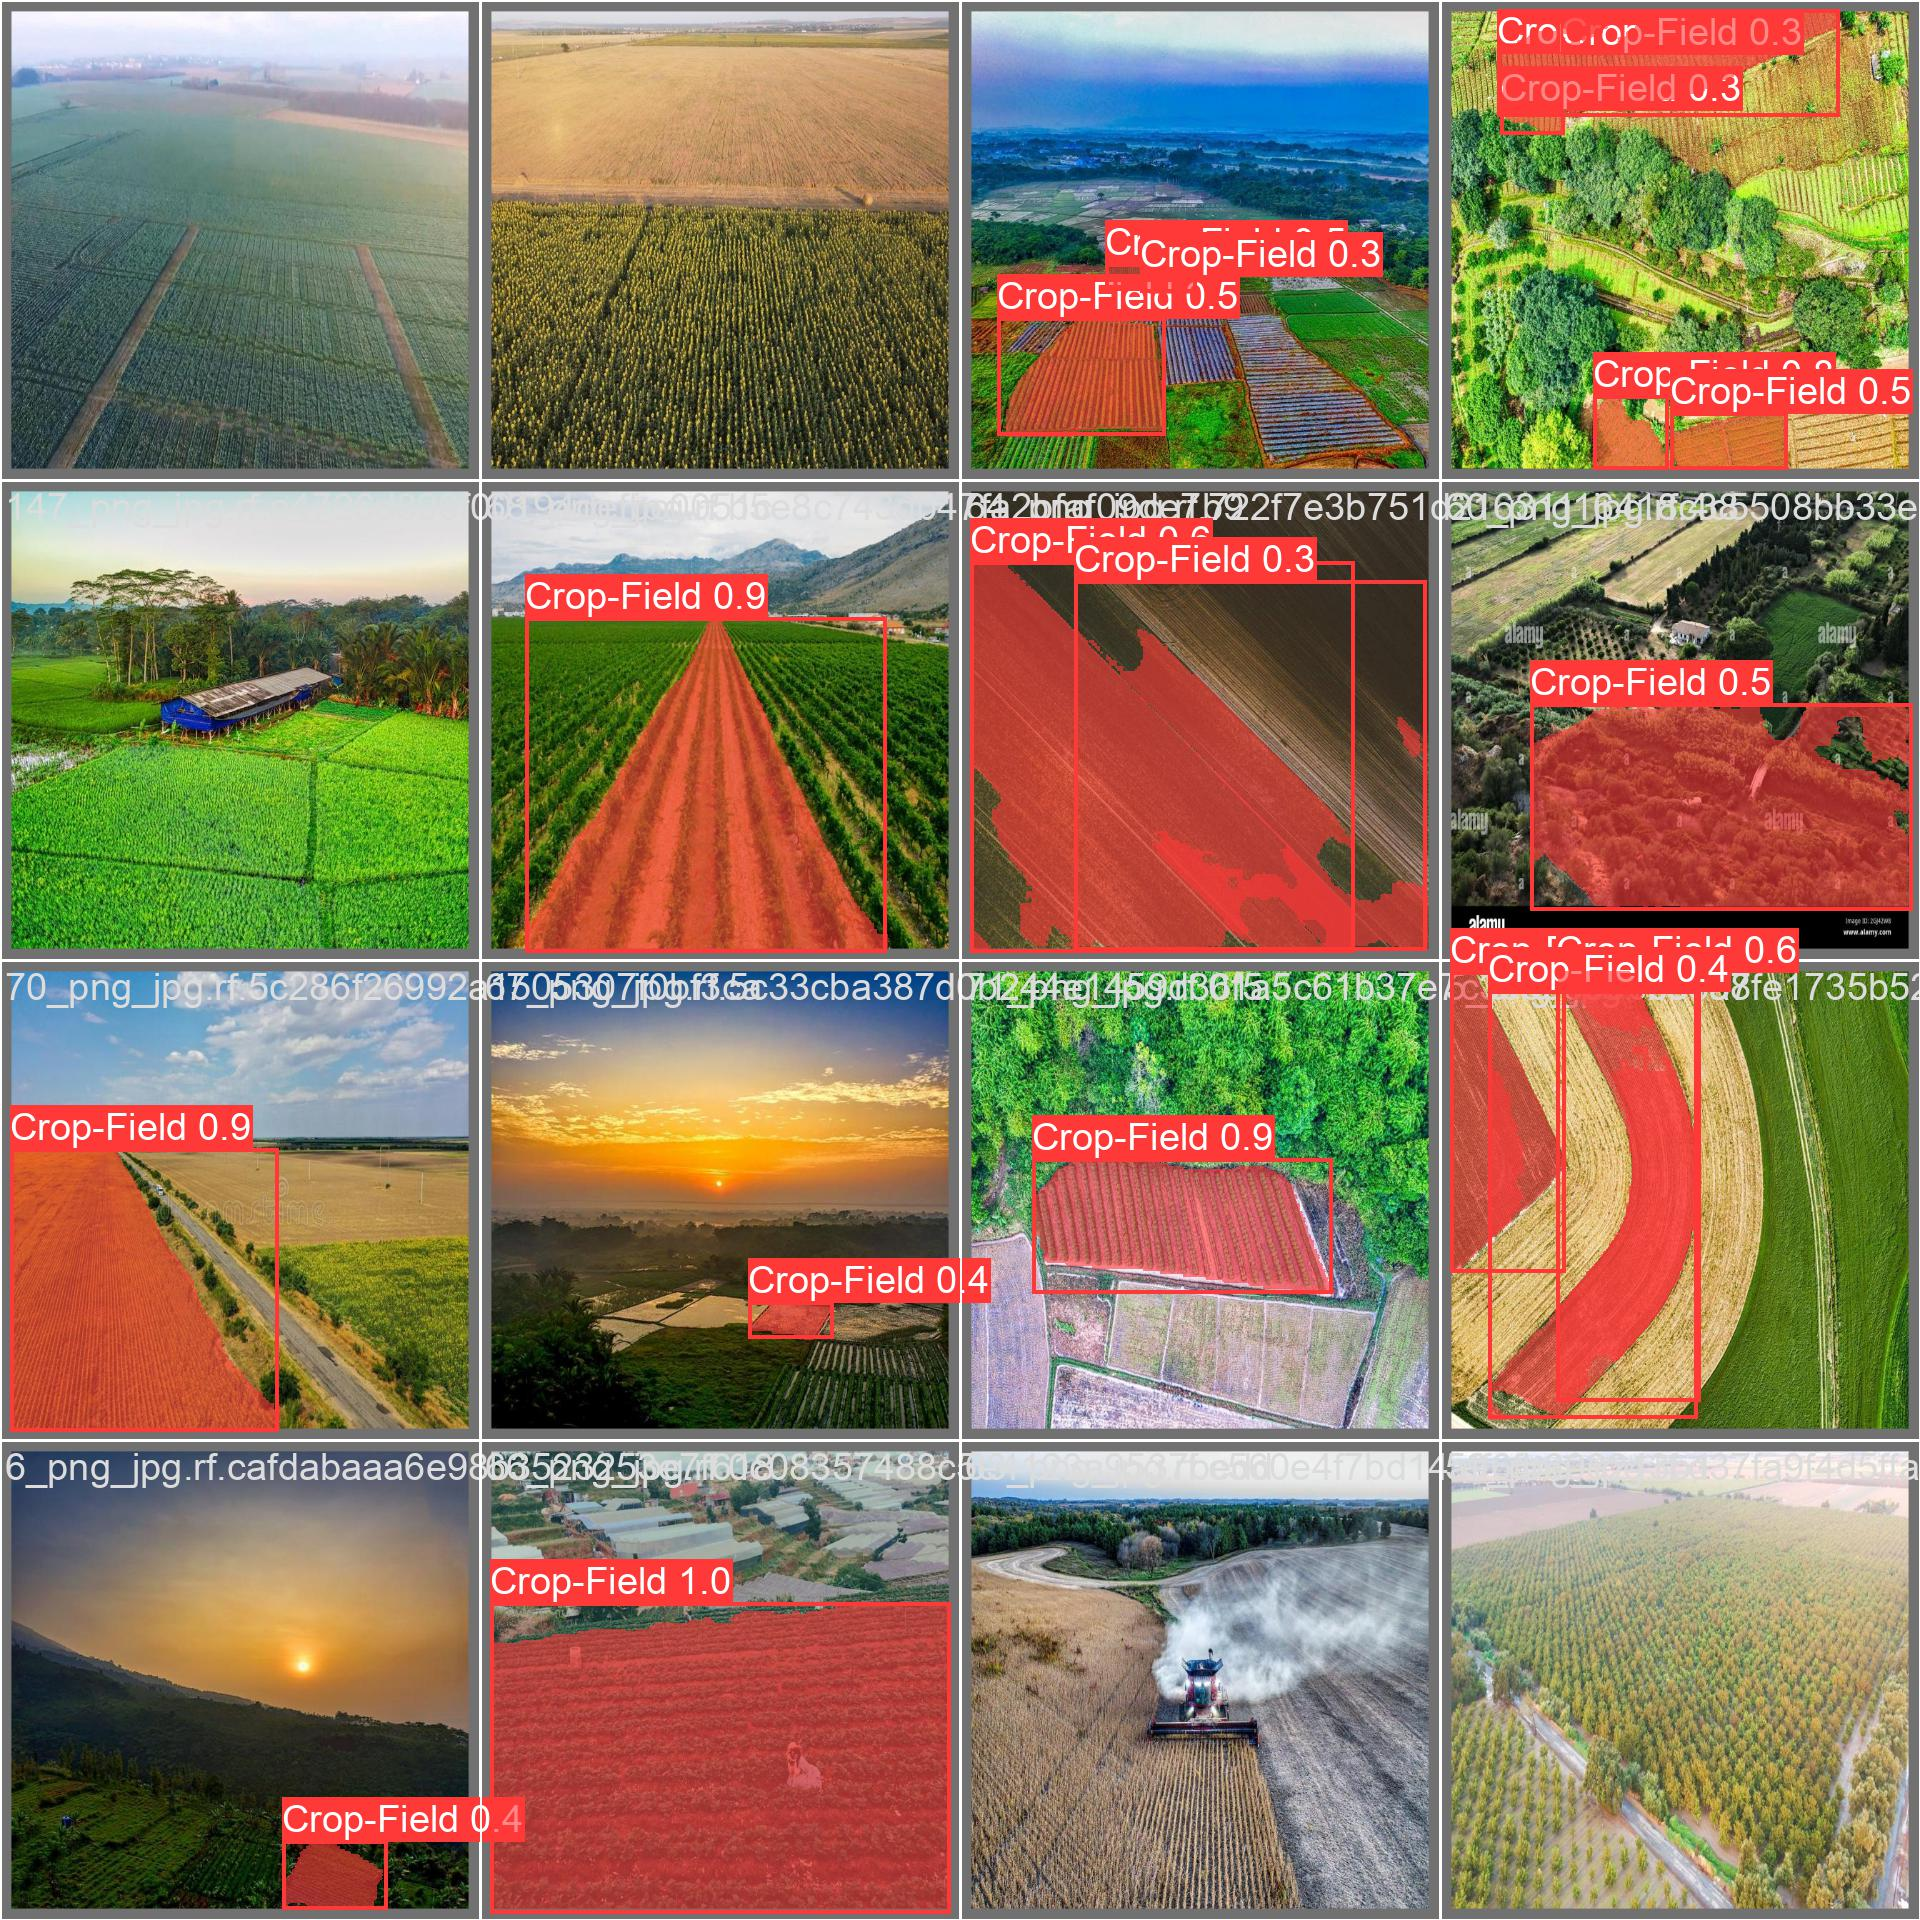

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1500)

## 8. Validate Model

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/datasets/Crop-Field-Detection-3/valid/labels.cache... 90 images, 46 backgrounds, 0 corrupt: 100% 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 6/6 [00:04<00:00,  1.34it/s]
                   all         90        123      0.648      0.797       0.76      0.641      0.648      0.797      0.761      0.587
Speed: 2.2ms pre-process, 8.0ms inference, 0.0ms loss, 2.4ms post-process per image


## 9. Run Model on Test Image(s)

In [13]:
%cd {HOME}

# Use this line to run inference on accompanying test dataset
# !yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

# Run inference on single image for demo
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={HOME} save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8x-seg summary (fused): 295 layers, 71721619 parameters, 0 gradients, 343.7 GFLOPs

image 1/1 /content/TestImage.jpg: 448x640 3 Crop-Fields, 32.0ms
Speed: 4.0ms pre-process, 32.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


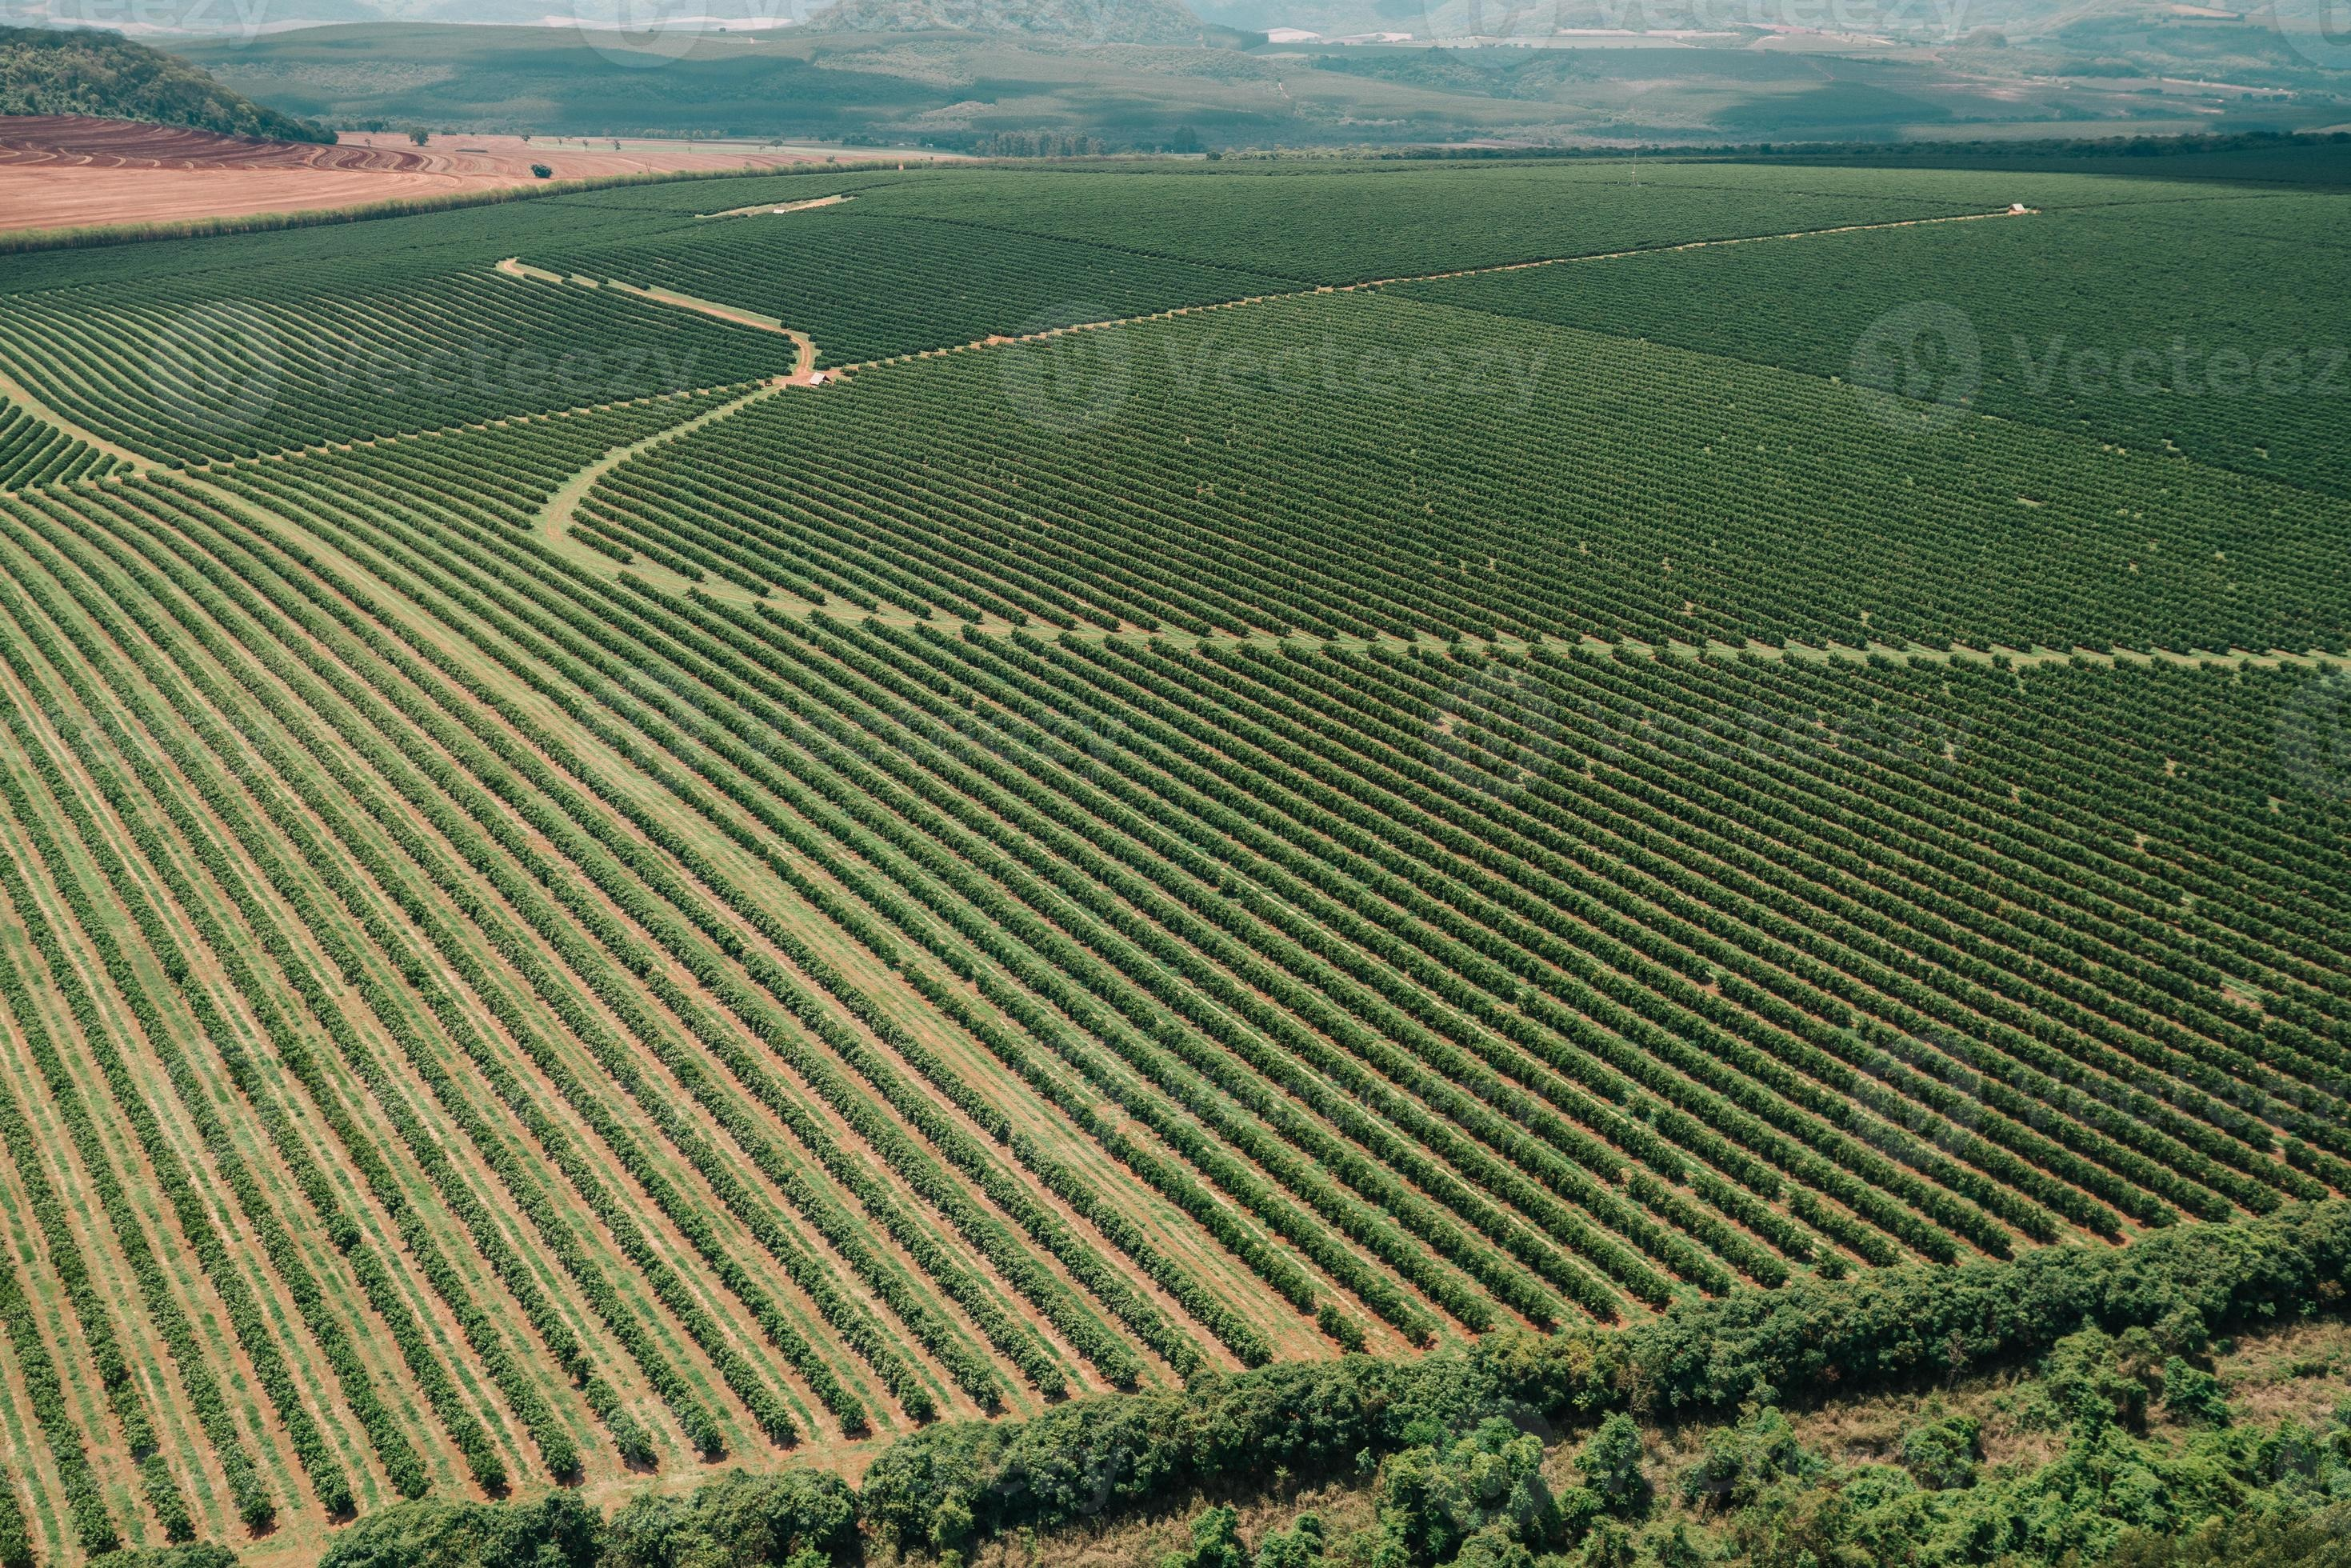

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/*.jpg'):
      display(Image(filename=image_path, height=640))
      print("\n")

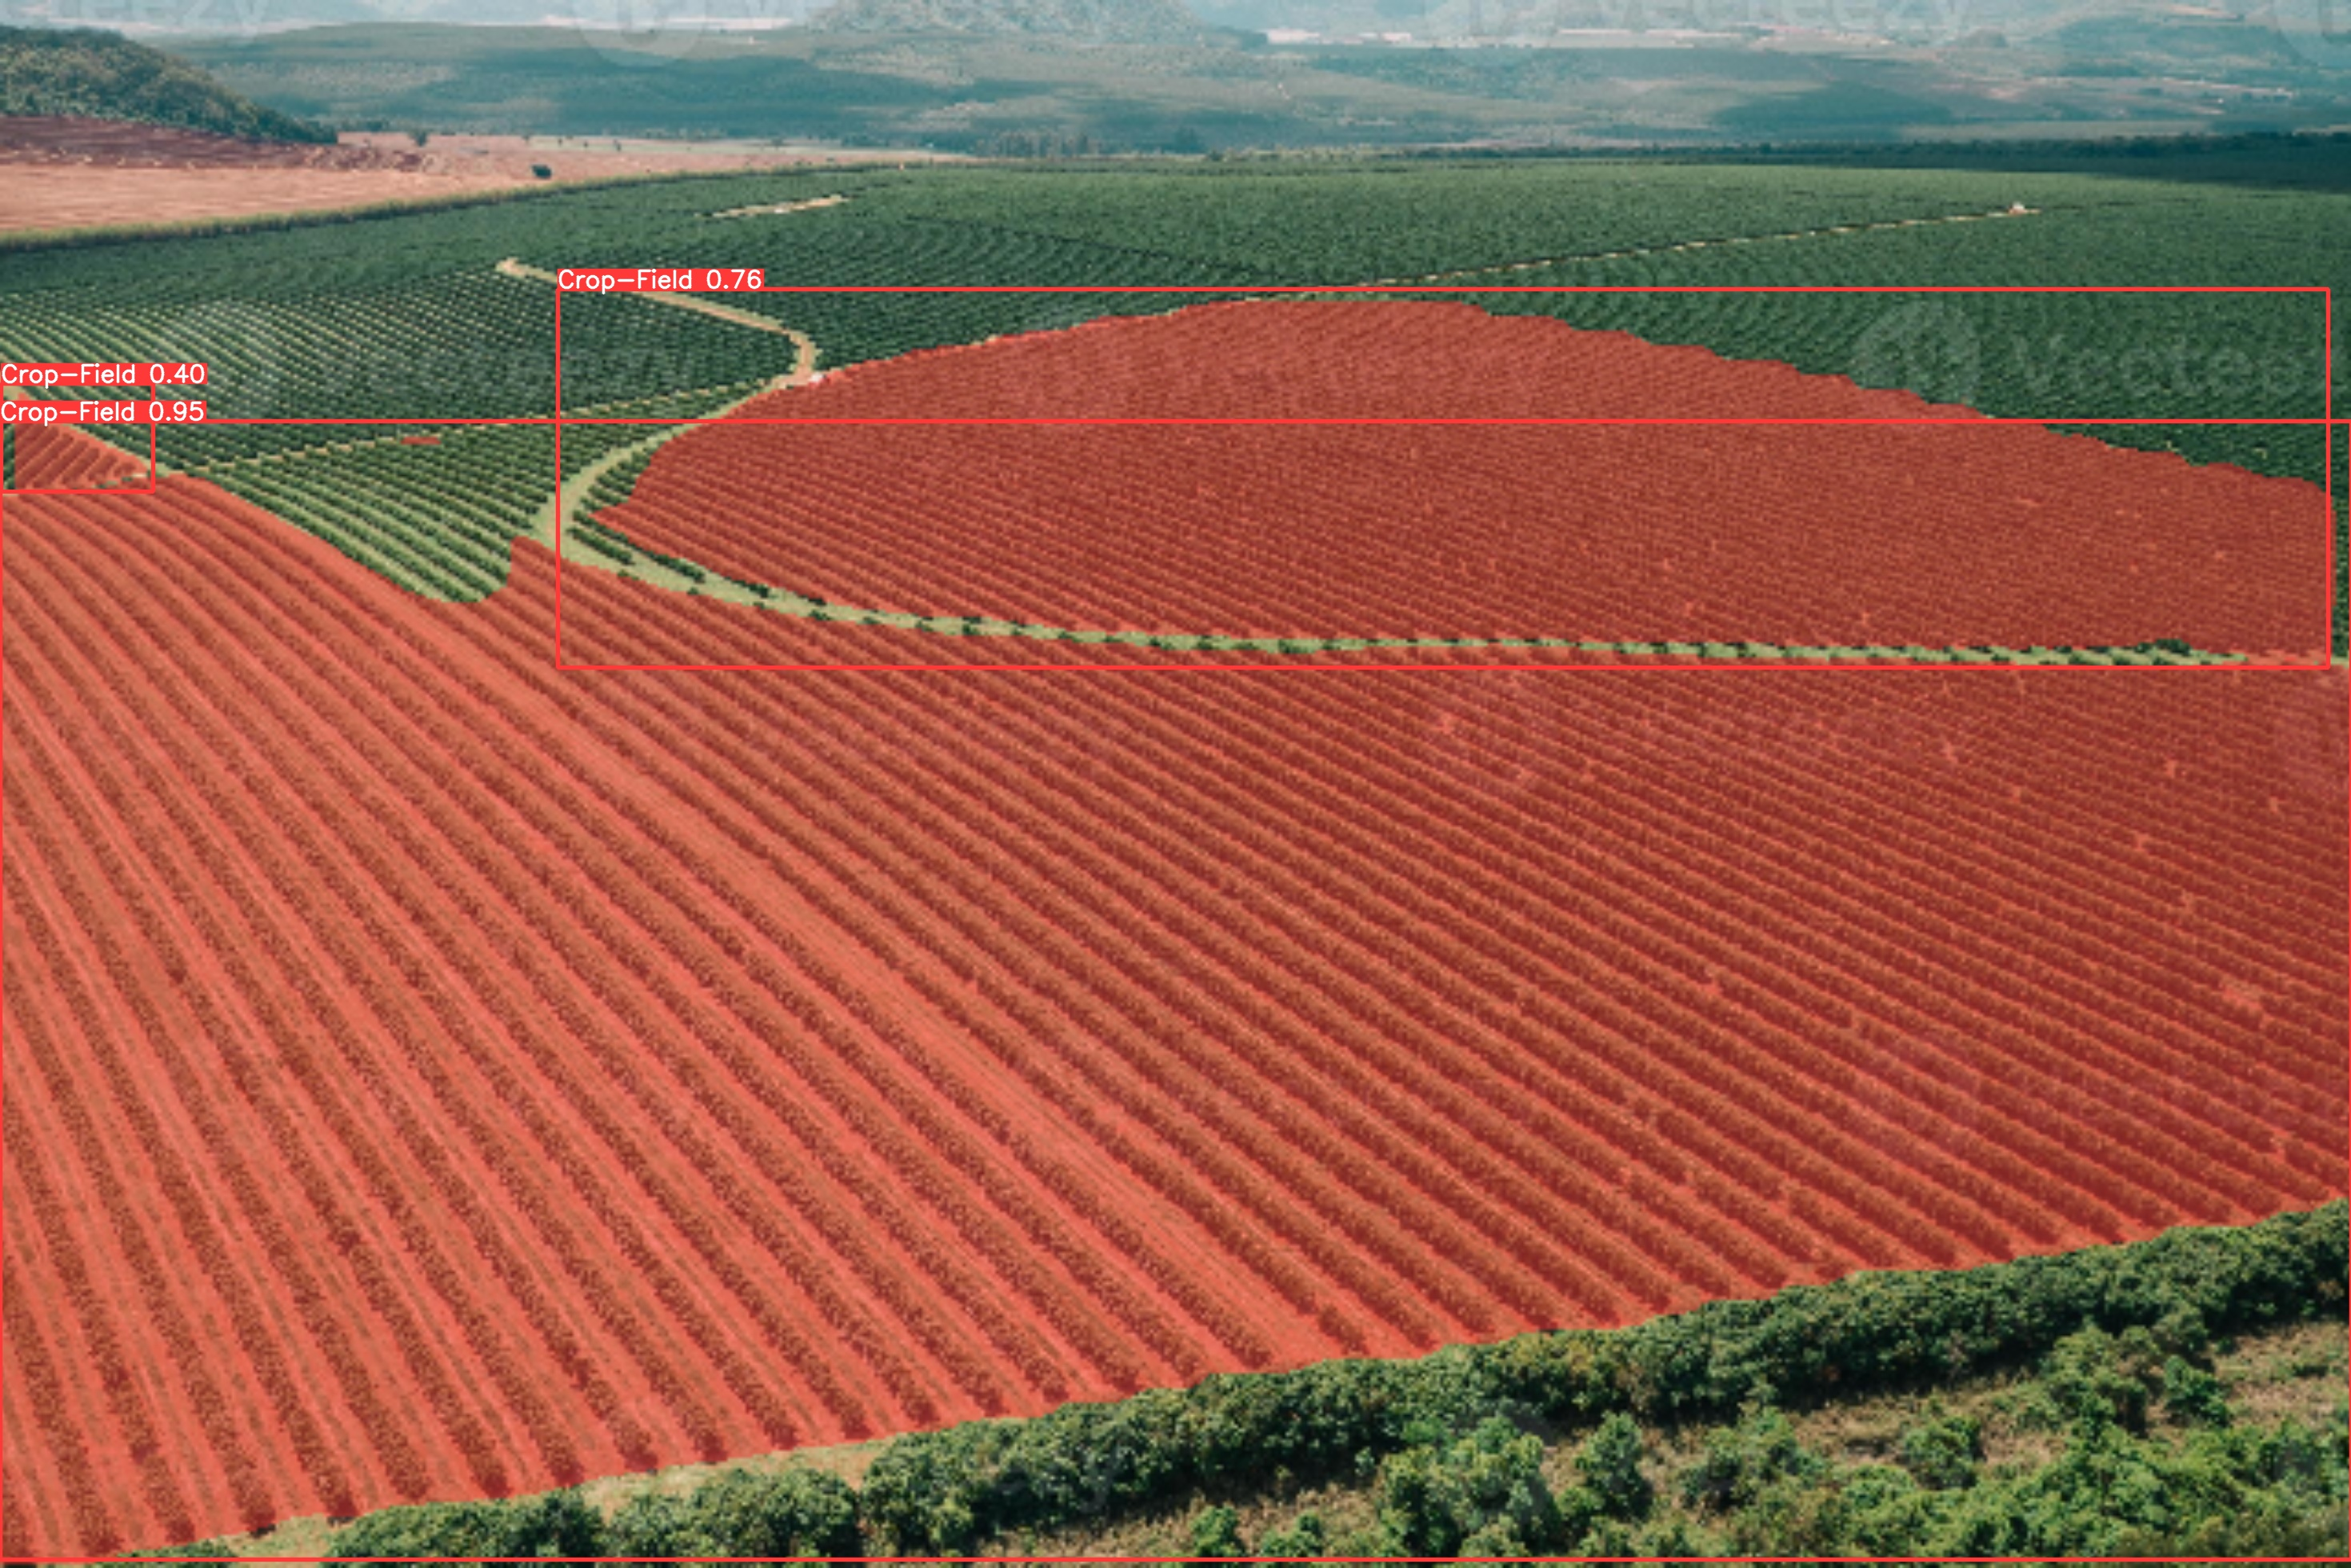

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg'):
      display(Image(filename=image_path, height=640))
      print("\n")